<a href="https://colab.research.google.com/github/griops/Pembelajaran-Mesin-Klasifikasi-Daun/blob/main/Tugas_SLO_Mengolah_Dataset_Daun_2101201041.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Permodelan Neural Network untuk mengolah Dataset berupa Klasifikasi Gambar Daun (TTI6A3_S2TE-31-01_Tugas Pertemuan 10)

Gregorius Pradana Satriawan - 2101201041

In [3]:
#Koneksi ke file Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/TugasSLO

/content/drive/My Drive/TugasSLO


In [5]:
#Melihat Isi Folder
%ls

3scenes@                        datadaun@     jalan.jpg
best_weight_scene_mobileNet.h5  dataset@      model_daun/
bobotdaunmantap.h5              DatasetDaun/  nnmodel_scene/


In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [7]:
# Melakukan pengambilan gambar yang terletak pada folder tersebut membuat label sesuai folder
print("Sedang Mengambil Gambar")
imagePaths = paths.list_images("dataset")
data = []
labels = []

Sedang Mengambil Gambar


In [8]:
#Membuka file gambar yang ada di folder "dataset" dan melakukan resize menjadi 320*320
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)
#membuat label sesuai sub folder
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [9]:
print(labels)

['GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11',

In [10]:
#konversi label ke array
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [11]:
print(labels)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [12]:
#memecah dataset menjadi untuk test 28% dan untuk train 72%
(belajar_daun_data, ujian_daun_data, belajar_daun_label, ujian_daun_label) = train_test_split(np.array(data),	np.array(labels), test_size=0.28, shuffle=True)
print(belajar_daun_data.shape)
print(ujian_daun_data.shape)
print(belajar_daun_label.shape)
print(ujian_daun_label.shape)

(1013, 224, 224, 3)
(394, 224, 224, 3)
(1013, 12)
(394, 12)


In [13]:
#membuat model dengan MobileNet
base_model = MobileNet(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(128,activation='relu')(x)
out = Dense(12, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

17227776/17225924 [==============================] - 2s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_______________________________________________________

In [14]:
#melakukan penghentian running jika sudah tidak naik bobot akurasinya
cut = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
#menyimpan model ke file 'bobotdaunmantap.h5'
checkpoint = ModelCheckpoint('bobotdaunmantap.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [15]:
# melakukan training dengan metode Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(belajar_daun_data, belajar_daun_label, validation_data=(ujian_daun_data, ujian_daun_label), epochs=20, batch_size=20, callbacks=[cut, checkpoint])

[INFO] training network...
Epoch 1/20
51/51 [==============================] - ETA: 0s - loss: 1.4626 - accuracy: 0.5380
Epoch 00001: val_accuracy improved from -inf to 0.07868, saving model to bobotdaunmantap.h5
51/51 [==============================] - 208s 4s/step - loss: 1.4626 - accuracy: 0.5380 - val_loss: 12.1196 - val_accuracy: 0.0787
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.7798 - accuracy: 0.7651
Epoch 00002: val_accuracy improved from 0.07868 to 0.38325, saving model to bobotdaunmantap.h5
51/51 [==============================] - 207s 4s/step - loss: 0.7798 - accuracy: 0.7651 - val_loss: 4.1785 - val_accuracy: 0.3832
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.5303 - accuracy: 0.8322
Epoch 00003: val_accuracy did not improve from 0.38325
51/51 [==============================] - 205s 4s/step - loss: 0.5303 - accuracy: 0.8322 - val_loss: 4.5659 - val_accuracy: 0.3604
Epoch 4/20
51/51 [==============================] - ETA: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


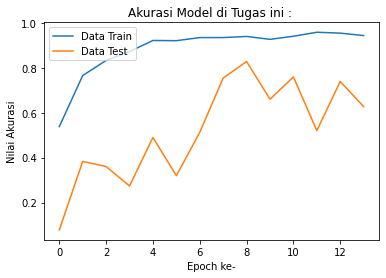

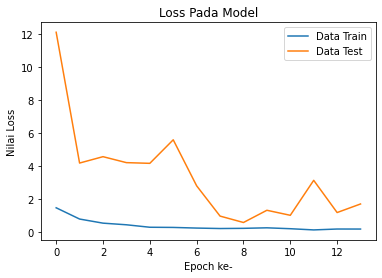

In [16]:
import matplotlib.pyplot as plt
#menggambar grafik akurasi terhadap training dan test
print(H.history.keys())
# Gambar grafik plot Akurasi Model
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Akurasi Model di Tugas ini : ')
plt.ylabel('Nilai Akurasi')
plt.xlabel('Epoch ke-')
plt.legend(['Data Train', 'Data Test'], loc='upper left')
plt.show()
# Grafik plot loss pada model
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Loss Pada Model')
plt.ylabel('Nilai Loss')
plt.xlabel('Epoch ke-')
plt.legend(['Data Train', 'Data Test'], loc='upper right')
plt.show()

In [19]:
print("Evaluasi Model")
predictions = model.predict(belajar_daun_data, batch_size=32)
print(classification_report(belajar_daun_label.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

Evaluasi Model
              precision    recall  f1-score   support

      GMB_01       0.85      1.00      0.92        87
      GMB_02       1.00      0.78      0.87        76
      GMB_03       0.93      0.97      0.95        73
      GMB_04       0.94      0.99      0.96        82
      GMB_05       0.96      0.98      0.97        87
      GMB_06       0.99      0.95      0.97        88
      GMB_07       0.82      1.00      0.90       100
      GMB_08       0.90      0.93      0.91        86
      GMB_09       0.76      1.00      0.86        81
      GMB_10       1.00      0.67      0.80        76
      GMB_11       0.98      0.64      0.77        94
      nonGMB       0.94      0.98      0.96        83

    accuracy                           0.91      1013
   macro avg       0.92      0.91      0.91      1013
weighted avg       0.92      0.91      0.90      1013



In [21]:
model.save('model_daun_fix')

INFO:tensorflow:Assets written to: model_daun_fix/assets
